# Lab 3 
## W203 Statistics for Data Science
### Annabelle Lee, Joy Chiang, Lucas Lam

## Introduction

**Research Question:** What variables have impact to reduce the crime rate in North Carolina?

The purpose of report is to provide the local government with information supporting policies to lower crime rates in North Carolina. We would like to study the scenarios enabling criminals to carry out a crime successfully when facing punishment. This entails a detailed analysis on crime rate and factors including the demographic of criminals, police involved, and probability of punishment. 

Ultimately, we want to set policy in such a way that incentivizes better choices and sets up deterrents for future criminal activity. Variables capturing certainty and severity of punishment help us think about the practical implications involved with carrying out crime. We will also look at the population of young males since gender and age are usually some of the informational predictors of crime.

In [51]:
# install.packages('car')
# install.packages('stargazer')
# install.packages('plyr')
# install.packages('sandwich')

## Initial Data Loading / Cleaning and EDA

In [52]:
# library(car)
library(stargazer)
library(plyr)
library(lmtest)
library(sandwich)

variable  | label
----------|------
1    county|               county identifier
2      year|                            1987
3    crmrte|     crimes committed per person
4    prbarr|         'probability' of arrest
5   prbconv|     'probability' of conviction
6   prbpris| 'probability' of prison sentence
7    avgsen|             avg. sentence, days
8     polpc|               police per capita
9   density|             people per sq. mile
10    taxpc|          tax revenue per capita
11     west|           =1 if in western N.C.
12  central|           =1 if in central N.C.
13    urban|                   =1 if in SMSA
14 pctmin80|            perc. minority, 1980
15     wcon|       weekly wage, construction
16     wtuc|    wkly wge, trns, util, commun
17     wtrd| wkly wge, whlesle, retail trade
18     wfir|    wkly wge, fin, ins, real est
19     wser|      wkly wge, service industry
20     wmfg|         wkly wge, manufacturing
21     wfed|         wkly wge, fed employees
22     wsta|       wkly wge, state employees
23     wloc|        wkly wge, local gov emps
24      mix| offense mix: face-to-face/other
25  pctymle|              percent young male

In [53]:
crime = read.csv(file = 'crime_v2.csv')
head(crime)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


In [54]:
summary(crime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

Looking at an initial summary of the data, here are some observations:
- "prbconv" immediately stands out and needs to be cleaned. 
- Every feature other than "prbconv" has 6 NA values. From command `tail(crime)` we know its the bottom 6
- "prbarr" has a value over 1, indicating that the ratio of arrests is greater than offenses in a county in North Carolina, which doesn't make sense, and is a significant outlier. 
- one county has "taxpc" or tax revenue per capita of over 100 which looks like an outlier.
- One county's "wser" or weekly wage for service industry is extremely high

Other than these observations, data seems reasonable at first glance. 

In [55]:
# First we will get rid of bottom 6 rows with all values N/A. They are meaningless
crime <- crime[1:91,]

### Clean up probabilities

In [56]:
# Turning prbconv into numeric values because there were non-numeric variables and putting into new dataframe "crime_cleaned." 
# Will be using crime_cleaned for the rest of data analysis

crime$prbconv <- as.numeric(levels(crime$prbconv))[crime$prbconv]
crime_cleaned = crime[!is.na(crime$prbconv), ]

options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

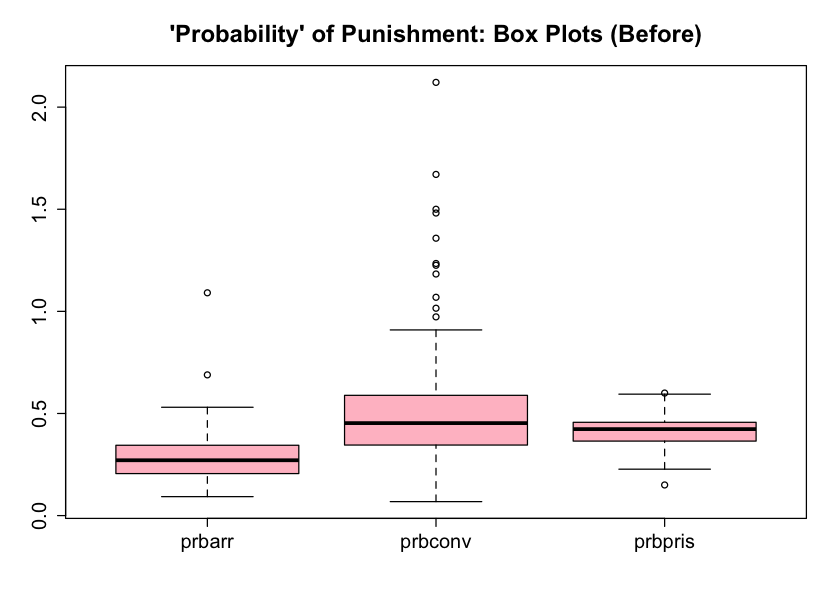

In [57]:
boxplot(crime_cleaned[c(4:6)],
        data=crime_cleaned,
        main="'Probability' of Punishment: Box Plots (Before)",
        col="pink")
options(repr.plot.height = 4, repr.plot.width = 6, repr.plot.pointsize = 8)

"Prbconv" now has numeric values, and so does "prbarr" and "prbpris", but some of which doesn't make sense. Probability of Conviction (prbconv) and probability of arrest (prbarr) should not have values over 1, because that would imply that no. of convictions is greater than no. arrests or no. of arrests is greater than no. offenses, which makes no sense. We will replace all values over 1 with NA value. 

It's important to note that "prbconv" probabilities being closer to 1 and higher than other probabilities makes sense, because it is more likely for someone to be convicted after being arrested than someone to be arrested after an offense, since a lot of offenses can happen without the police noticing. It's the probabilities that are over 1 that make no logical sense, so we replace them with NA.



In [58]:
# cleaning prbconv
crime_cleaned$prbconv[crime_cleaned$prbconv > 1] = NA
summary(crime_cleaned$prbconv, na.rm = T)

# cleaning prbbarr
crime_cleaned$prbarr[crime_cleaned$prbarr > 1] = NA
summary(crime_cleaned$prbarr, na.rm = T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.06838 0.33470 0.43896 0.44824 0.52760 0.97297      10 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.09277 0.20495 0.27000 0.28607 0.34331 0.68902       1 

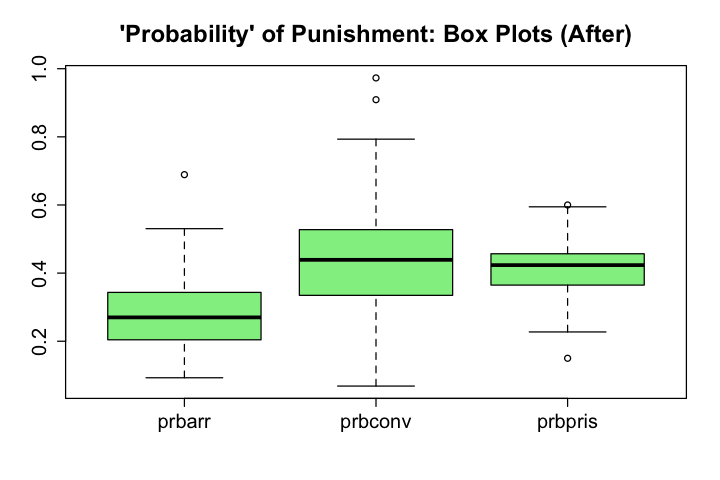

In [59]:
boxplot(crime_cleaned[c(4:6)],
        data=crime_cleaned,
        main="'Probability' of Punishment: Box Plots (After)",
        col="light green")

### Other Values to be Cleaned

Per observation earlier, one county has tax per capita (taxpc) that is significantly higher than the rest. 

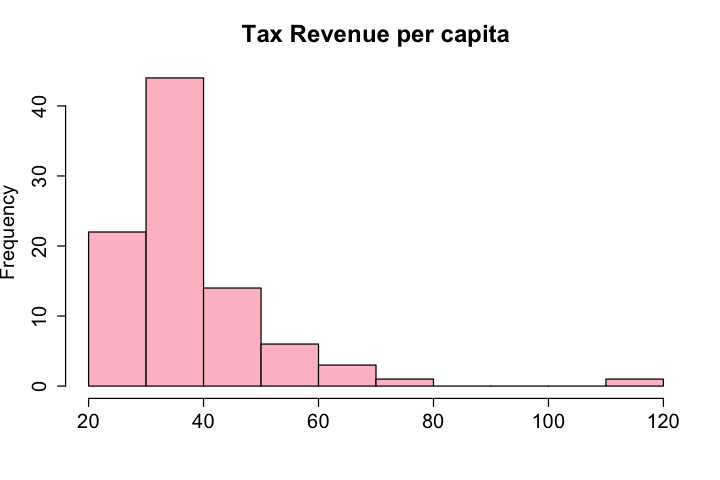

In [60]:
hist(crime_cleaned$taxpc, 
     main="Tax Revenue per capita",
     ylab="Frequency", 
     col='pink', xlab=NULL)

But we will decide to leave it because it is possible for tax per capita to be that high. If a particular county has less people but really high income or just really high income, then they might be paying more state tax per head.



Likewise, one county had over 2000 dollars in weekly wage for the service industry. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  133.0   229.7   253.2   275.6   280.5  2177.1 

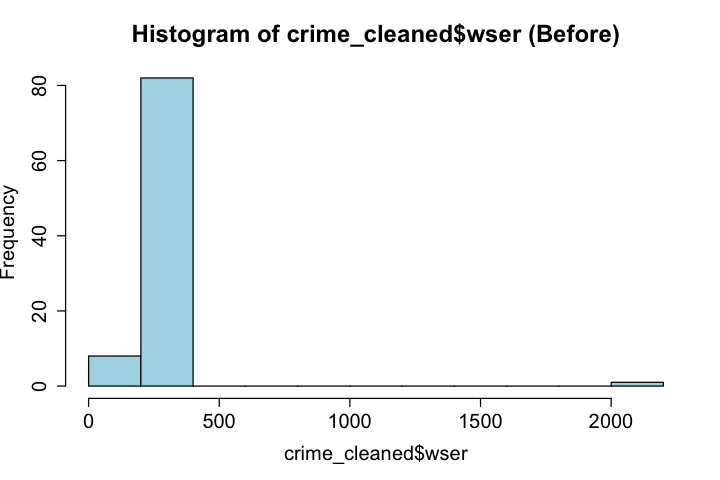

In [61]:
summary(crime_cleaned$wser)
hist(crime_cleaned$wser, col='light blue', main = "Histogram of crime_cleaned$wser (Before)")

Looking at this extreme outlier, it makes no sense that one county's wage is 10 times the average of other counties in the same industry. Everyone would move to that county and wages in the service industry would reach equilibrium eventually. We will change it to NA. 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  133.0   229.3   253.1   254.4   277.6   391.3       1 

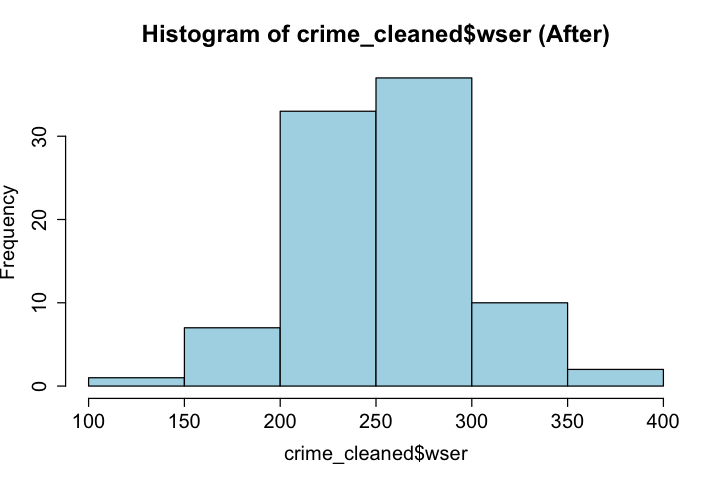

In [62]:
crime_cleaned$wser[crime_cleaned$wser > 2000] = NA
summary(crime_cleaned$wser, na.rm = T)
hist(crime_cleaned$wser, col = 'light blue', main = "Histogram of crime_cleaned$wser (After)")

In addition to value clean ups, we can clean up our dataframe. 

We don't need the county number, since its not a nominal variable, and we're not interested in specific counties. We're interested in North Carolina as a whole.

In [63]:
summary(crime_cleaned$county)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    52.0   105.0   101.6   152.0   197.0 

In [64]:
# Getting rid of county no.

crime_cleaned$county <- NULL
summary(crime_cleaned$county)

Length  Class   Mode 
     0   NULL   NULL 

We also don't need year, since its all in 1987. 

In [65]:
# Getting rid of year

crime_cleaned$year <- NULL
crime_cleaned <-na.omit(crime_cleaned)

In [66]:
crime_cleaned <-na.omit(crime_cleaned)

### Some more EDA

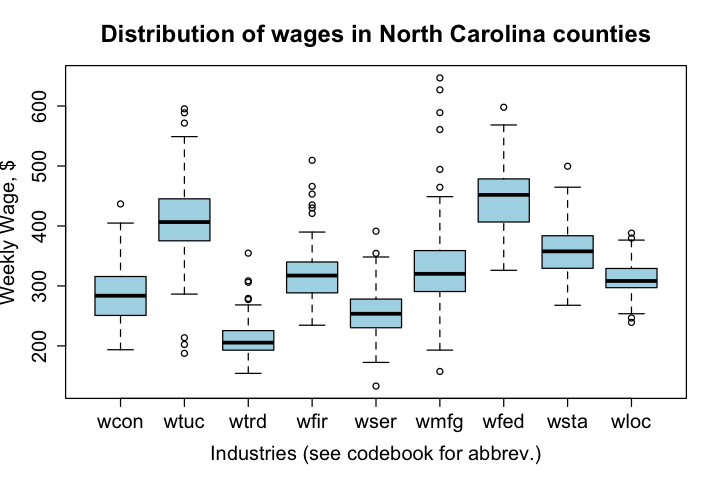

In [67]:
boxplot(crime_cleaned[c(13:21)], 
        ylab = "Weekly Wage, $", 
        xlab = "Industries (see codebook for abbrev.)",
        data = crime_cleaned,
        main = "Distribution of wages in North Carolina counties",
        col = "lightblue")

Retail trade has overall the lowest average wage compare to other industries and federal has the highest. There are reasonable outliers across industries. However, our wage data is limited in scope by the demographics of individuals working in each industry. We do not know the total number of people in each field and the tenure levels of employees. Other than that, we also realize that wages tend to trend together with productivity in economics. While we will observe individual wages, we will analyze them as a group to understand if there is joint significance throughout our model building process.

In [68]:
scatterplotMatrix(crime_cleaned[,c("crmrte", "mix","polpc","pctmin80","avgsen", "taxpc", "density")])

ERROR: Error in scatterplotMatrix(crime_cleaned[, c("crmrte", "mix", "polpc", : could not find function "scatterplotMatrix"


There are outliers in the tax revenue per capita (taxpc), but the data does not appear to have many anomalies. We have limited information on the demographics of individuals working in the various industries separated by wages.

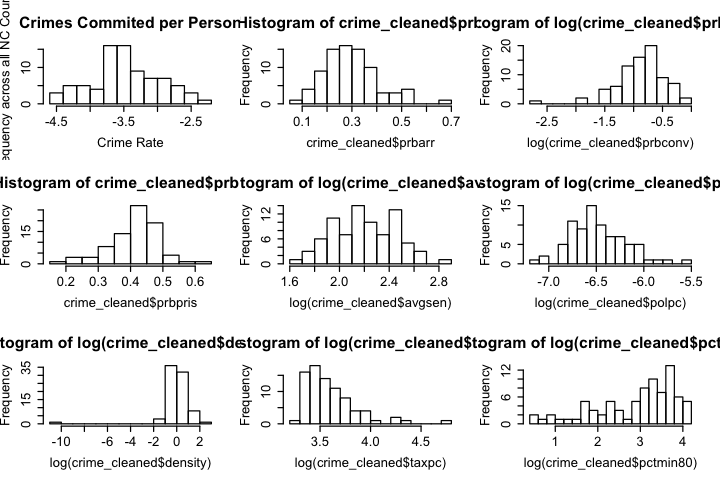

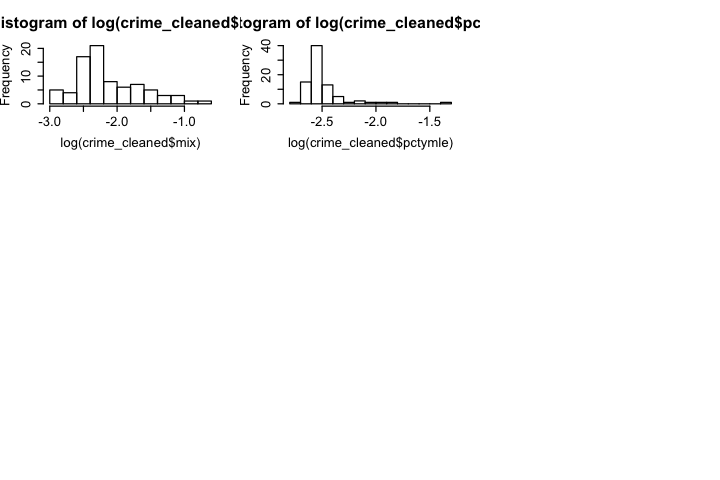

In [69]:
par(mfrow=c(3,3))

hist(log(crime_cleaned$crmrte), xlab='Crime Rate', ylab='Frequency across all NC Counties', main='Crimes Commited per Person')
hist(crime_cleaned$prbarr, breaks = 15)
hist(log(crime_cleaned$prbconv), breaks = 15)
hist(crime_cleaned$prbpris, breaks = 15)
hist(log(crime_cleaned$avgsen), breaks = 15)
hist(log(crime_cleaned$polpc), breaks = 15)
hist(log(crime_cleaned$density), breaks = 15)
hist(log(crime_cleaned$taxpc), breaks = 15)
hist(log(crime_cleaned$pctmin80), breaks = 15)
hist(log(crime_cleaned$mix), breaks = 15)
hist(log(crime_cleaned$pctymle), breaks = 15)

Decided to take the log of some of the features to get a normal curve, which will improve accuracy of regression models

## Model Building Process
### Model 1

In [70]:
m1 <- lm(crmrte ~ prbarr + avgsen + polpc, data=crime_cleaned)
summary(m1)



Call:
lm(formula = crmrte ~ prbarr + avgsen + polpc, data = crime_cleaned)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.031513 -0.006833 -0.000959  0.006195  0.041265 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.008e-02  8.593e-03   3.501 0.000774 ***
prbarr      -7.540e-02  1.414e-02  -5.334 9.34e-07 ***
avgsen      -9.226e-05  6.603e-04  -0.140 0.889241    
polpc        1.771e+01  2.947e+00   6.009 5.81e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01357 on 77 degrees of freedom
Multiple R-squared:  0.5015,	Adjusted R-squared:  0.4821 
F-statistic: 25.82 on 3 and 77 DF,  p-value: 1.162e-11


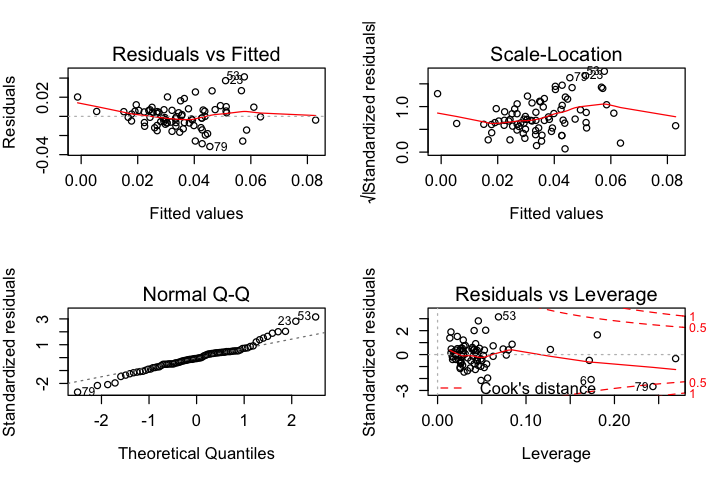

In [71]:
par(mfrow=c(2,2))

plot(m1, which=1)
plot(m1, which=3)
plot(m1, which=2)
plot(m1, which=5)

options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)

Q1. Identify what you want to measure with each coefficient
- Model is measuring effects of the following variables, with justification for why we included it:
    - **probability of arrest (prbarr)**: how frequently people are arrested when convicted can affect crime rates, and can lead to tangible policy changes
    - **police per capita (polpc)**: no. of police per capita can affects crime rates and can lead to tangible policy changes
    - **average prison sentence in days (avgsen)**: how long people are put in jail can affect crime rates, can also lead to tangible policy changes

Q2. Interpret the result of the regression in a thorough and convincing manner
- Regression with 3 features had two statistically significant figures with adjusted R^2 of 0.482 and df = 77, which means that 48% of crime rate is explained by the model with 3 features. 
- Interpretation of statistically significant variables:
    - **probability of arrest (prbarr)**: an increase in percentage point in probability of arrest is associated with an 0.0754 percent point decrease in crime rate. 
    - **police per capita (polpc)**: an increase in one percentage point in police per capita is associated with an 17 percentage point increase in crime rate. 

- Judging from the residual and the fitted values plot, the regression line fitted the data well. We can see that the residuals mostly range from -0.02 to 0.02, which is relatively small.


Q3. Evaluate all 6 CLM assumptions

    1.Linear population model

         We haven't constrained the error term yet, which means this assumption is fulfilled automatically.

    2.Random Sampling

        We don't actually know the way the data was gathered, because study doesn't mention how the counties were selected. We also don't know if there is clustering, but because the data of any individual does not provide information about the data of any other individual and we are drawing from the same population, we know that the sampling is independent and identically distributed, therefore we can say that random sampling assumption is fulfilled.

    3.No perfect multicollinearity

        Checked with vif(m1) and got prbarr=1.222242, avgsen=1.317342, polpc=1.559896 . We can see that R kept all variables with no errors, so this assumption was necessarily fulfilled.

    4.Zero-conditional mean

        Looked at the graph resid vs. fitted values, we can see that the mean is roughly zero, so we say that we meet this condition, even though there is a bit of curvature with the red line which proxies the mean residual values.   
        
    5.Homoskedasticity

    Looked at the scale-location graph, the red line which proxies the mean of the standardized residuals is not flat, which means that errors are not homoskedastic. We fail this assumption.
    
    6.Normality of Errors
    Look at QQ plot, we'll rely on the CLT, and know that our coefficients have a roughly normal sampling distribution.

We saw that the zero-conditional mean assumption was barely met, and the homoskedasticity assumption was not met. We could simply use robust standard errors to account for lack of homoskedasticity, but we can also do some log transformations that made variables more normal, to get a better approximation. We will use both robust standard errors and log transformations. 


In [72]:
m1_log <- lm(log(crmrte) ~ prbarr + log(avgsen) + log(polpc), data=crime_cleaned)

coeftest(m1_log, vcov = vcovHC)
vcovHC(m1_log)
summary(m1_log)$r.squared
summary(m1_log)$adj.r.squared

AIC(m1_log)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  2.5452093  1.5777591  1.6132 0.1107966    
prbarr      -2.0499935  0.6012662 -3.4095 0.0010388 ** 
log(avgsen) -0.0085802  0.1990178 -0.0431 0.9657234    
log(polpc)   0.8316392  0.2171726  3.8294 0.0002601 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


,(Intercept),prbarr,log(avgsen),log(polpc)
(Intercept),2.4893238,0.415202592,-0.211453371,0.32763215
prbarr,0.4152026,0.361521033,-0.003260074,0.07853436
log(avgsen),-0.2114534,-0.003260074,0.039608072,-0.01910985
log(polpc),0.3276322,0.078534364,-0.019109848,0.04716395


[1] 0.5111791

[1] 0.4921341

[1] 70.37855

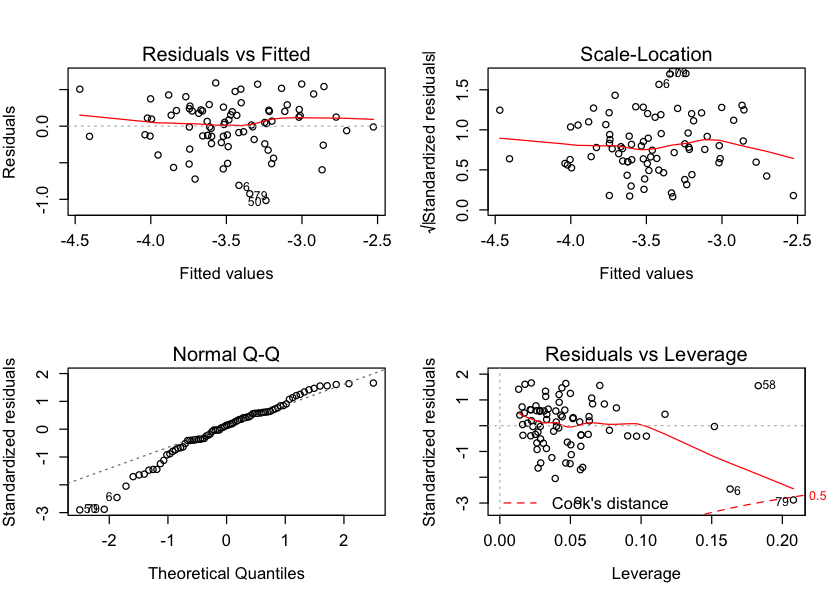

In [73]:
par(mfrow=c(2,2))

plot(m1_log, which=1)
plot(m1_log, which=3)
plot(m1_log, which=2)
plot(m1_log, which=5)

options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)

Taking the log of crime rate, log of average sentence, and log of police per capita, we were able to get a slightly better fit, and model with log transformations better meet the Zero-Conditional Mean and Homoskedasticity assumption. Both the residuals vs Fitted plot and Scale-Location plot has flatter red lines.

- interpretation of new statistically significant coefficients:
    - **probability of arrest (prbarr)**: an increase in percentage point in probability of arrest is associated with an 2.54% decrease in crime rate. 
    - **police per capita (polpc)**: an increase in one percent in police per capita is associated with an 0.8% increase in crime rate (elasticity)


What caught us by surprise was that according to the model, with probability of arrest and average sentence constant, it was statistically significant that an increase in police per capita actually is associated with an increase in crime rate, and not the other way around. 

Average sentence in days was not statistically significant, so policy makers need not worry about increasing average sentences to try to decrease crime. 

According to the model, probability of arrest is statistically significant and an increase in it is associated with a decrease in crime rate. 

There are a lot of omitted variables to consider, so we can move on to models with more variables, and then discuss about ommitted variables

### Model 2

In [74]:
m2 <- lm(log(crmrte) ~ prbarr + log(polpc) + log(prbconv) + prbpris + log(pctmin80) + log(pctymle) + log(density), data=crime_cleaned)

coeftest(m2, vcov = vcovHC)
# vcovHC(m2)
print("R-squared")
summary(m2)$r.squared
summary(m2)$adj.r.squared

AIC(m2)


t test of coefficients:

               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)    1.880085   1.387745  1.3548 0.1796668    
prbarr        -1.460417   0.363263 -4.0203 0.0001400 ***
log(polpc)     0.825970   0.204111  4.0467 0.0001277 ***
log(prbconv)  -0.055777   0.131116 -0.4254 0.6717937    
prbpris       -0.317797   0.499540 -0.6362 0.5266488    
log(pctmin80)  0.239670   0.038838  6.1710 3.437e-08 ***
log(pctymle)   0.071558   0.203645  0.3514 0.7263097    
log(density)   0.131551   0.076029  1.7303 0.0878087 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] "R-squared"


[1] 0.8120366

[1] 0.7940127

[1] 0.962876

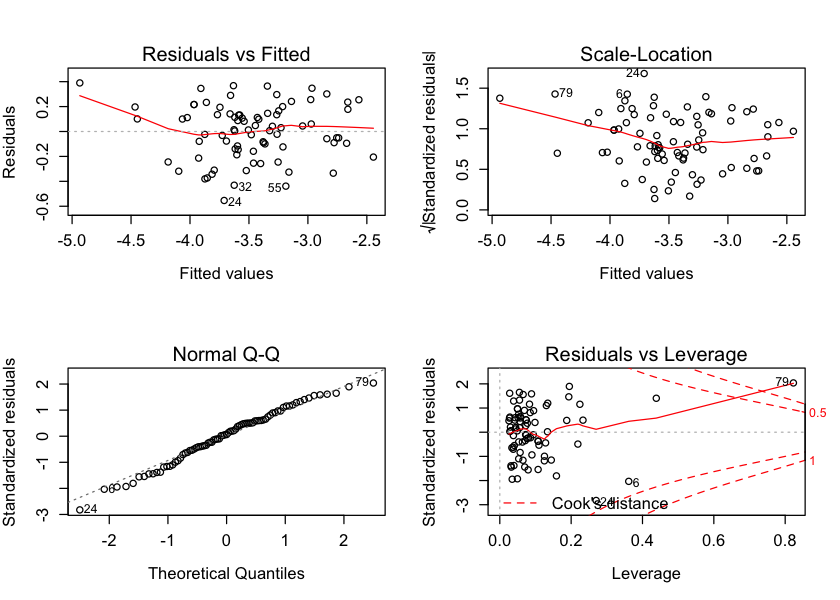

In [75]:
par(mfrow=c(2,2))

plot(m2, which=1)
plot(m2, which=3)
plot(m2, which=2)
plot(m2, which=5)

options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)

Q1. Identify what you want to measure with each coefficient
- Model is measuring effects of the following variables, with justification for why we included it:
    - **probability of arrest (prbarr)**: from previous model, how frequently people are arrested when convicted can affect crime rates, and can lead to tangible policy changes
    - **police per capita (polpc)**: from previous model, no. of police per capita can affects crime rates and can lead to tangible policy changes
    - **average prison sentence in days (avgsen)**: from previous model: how long people are put in jail can affect crime rates, can also lead to tangible policy changes
    - **probability of conviction (prbconv)**: the more convictions per arrests, can affect crime rates. Can also lead to policy changes
    - **probability of prison (prbpris)**: the more imprisonments per conviction, the stricter the law, can affect crime rates and can lead to policy changes
    - **percent miority in 1980 (pctmin80)**: due to reality of possibility of correlation between minority groups and crime rates, even though it may not lead to direct policy changes
    - **percent young male (pctymle)**: also a reality that crime is done by more capable, stronger, and younger men.
    - **density**: included variable to control for population density. An increase in density increases people and increase crime rates. 


Q2. Interpret the result of the regression in a thorough and convincing manner
- Regression with 7 features has an adjusted R^2 of 0.79, which represents that 79% of the variability of crime rates is explained by the model. "prbarr", "log(polpc)", "log(pctmin80)", and were statistically significant variables. 
- Interpretation of statistically significant variables:
    - **probability of arrest (prbarr)**: an increase in percentage point in probability of arrest is associated with an 1.46% decrease in crime rate. 
    - **police per capita (polpc)**: an increase in one percent in police per capita is associated with an 0.83% percent increase in crime rate. 
    - **percent minority in 1980 (pctmin80)**: an increase in one percent of minority population in 1980 is associated with an increase of 0.24% in crime rate. 

Q3. Evaluate all 6 CLM assumptions

    1.Linear population model

         We haven't constrained the error term yet, which means this assumption is fulfilled automatically.

    2.Random Sampling

         We don't actually know the way the data was gathered, because study doesn't mention how the counties were selected. We also don't know if there is clustering, but because the data of any individual does not provide information about the data of any other individual and we are drawing from the same population, we know that the sampling is independent and identically distributed, therefore we can say that random sampling assumption is fulfilled.

    3.No perfect multicollinearity
        
        We can see that R kept all variables with no errors, so this assumption was necessarily fulfilled.
    

    4.Zero-conditional mean
        Looking residuals vs fitted plot, it looks like there is a little bit of curvature in the residuals, mainly from one data point on the left side of the graph. Otherwise, the red-line is relatively flat.  
        
    5.Homoskedasticity
        
    Looking at Scale Location plot, the red line is relatively flat. We also use robust standard errors, so this assumption is fulfilled. 
    
    
    6.Normality of Errors
    
    Look at QQ plot below, the distribution of the errors are relatively normal. 

We found that including density variable was pretty crucial to the regression. Without density, adjusted r^squared was 0.7, and AIC was still relatively high, but with density and a log transformation, r^2 jumped up and AIC went down. Density was an omitted variable in Model 1, which pushed coefficients such as prbarr and polpc away from zero, so including Density allows us to hold it constant and measure other coefficients more precisely.





### Model 3

To see which variables want to add for our model, we want to test if wage statistics has anything to do with crime rates, or if regions affect the regression that much.  We can run an F-test that the coefficients for wage features = 0, and that west, central, and urban coefficients also = 0.


In [76]:
m3_res_wage <- lm(log(crmrte) ~ prbarr + log(prbconv) + prbpris + log(avgsen) + log(polpc) + log(density) + log(taxpc) + log(pctmin80) + log(mix) + log(pctymle) + west + central + urban, data=crime_cleaned)

waldtest(m3, m3_res_wage)

m3_res_location <- lm(log(crmrte) ~ prbarr + log(prbconv) + prbpris + log(avgsen) + log(polpc) + log(density) + log(taxpc) + log(pctmin80) + log(mix) + log(pctymle) + wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc, data=crime_cleaned)

waldtest(m3, m3_res_location)

Res.Df,Df,F,Pr(>F)
58,NA,NA,NA
67,-9,3.063113,0.004543049


Res.Df,Df,F,Pr(>F)
58,NA,NA,NA
61,-3,3.076376,0.03452931


Looking at the p value for the F-test comparing regressions with and without wage, we found that coefficients for wage were jointly significant, so we reject the null hypothesis that all the coefficients for wage = 0, so we will be keeping them in model 3. However, the p-value testing for joint significance for location was above 0.05, which means we fail to reject the null hypothesis that the coefficients for location variables = 0. We can try to exclude the variables "west", "central", "urban" and see what it does to the model

In [77]:
m3_1 <- lm(log(crmrte) ~ prbarr + log(prbconv) + prbpris + log(avgsen) + log(polpc) + log(density) + log(taxpc) + log(pctmin80) + log(mix) + log(pctymle) + wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc, data=crime_cleaned)

coeftest(m3_1, vcov = vcovHC)
# vcovHC(m3)
print("R-squared")
summary(m3_1)$r.squared
summary(m3_1)$adj.r.squared

AIC(m3_1)


t test of coefficients:

                 Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)    2.53797944  2.19086282  1.1584  0.251200    
prbarr        -1.52686108  0.31837538 -4.7958 1.082e-05 ***
log(prbconv)   0.00755812  0.13958788  0.0541  0.956996    
prbpris       -0.60208353  0.47227560 -1.2749  0.207195    
log(avgsen)   -0.25592453  0.14459204 -1.7700  0.081728 .  
log(polpc)     0.81214380  0.25560818  3.1773  0.002334 ** 
log(density)   0.12561026  0.11548320  1.0877  0.281010    
log(taxpc)     0.18977373  0.16727015  1.1345  0.261009    
log(pctmin80)  0.21687189  0.03877611  5.5929 5.578e-07 ***
log(mix)      -0.02390977  0.08812946 -0.2713  0.787074    
log(pctymle)   0.36981248  0.14149492  2.6136  0.011269 *  
wcon          -0.00020161  0.00077362 -0.2606  0.795273    
wtuc           0.00051049  0.00064922  0.7863  0.434726    
wtrd           0.00265862  0.00132572  2.0054  0.049360 *  
wfir          -0.00191922  0.00064933 -2.9557  0.004430 ** 
wser          

[1] "R-squared"


[1] 0.8674821

[1] 0.826206

[1] -3.34898

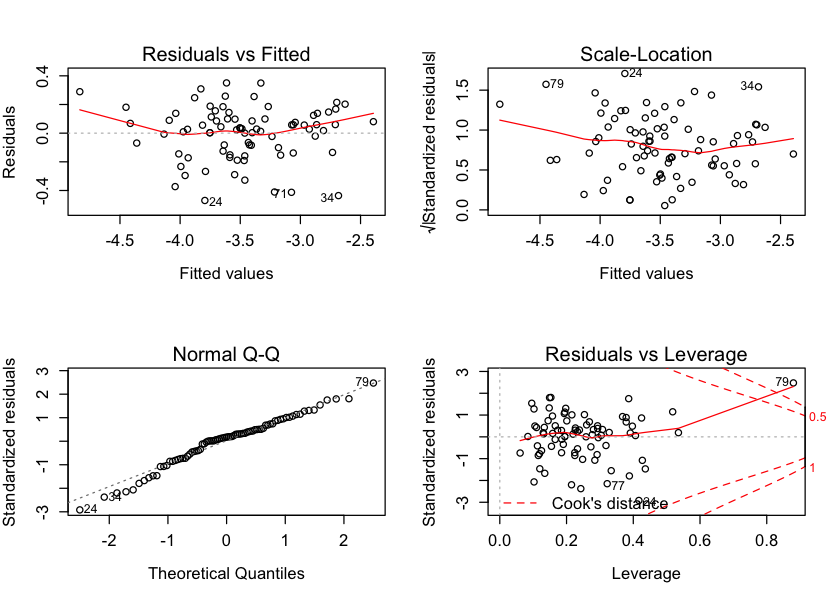

In [78]:
par(mfrow=c(2,2))

plot(m3_1, which=1)
plot(m3_1, which=3)
plot(m3_1, which=2)
plot(m3_1, which=5)

options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)

In [79]:
m3 <- lm(log(crmrte) ~ prbarr + log(prbconv) + prbpris + log(avgsen) + log(polpc) + log(density) + log(taxpc) + log(pctmin80) + log(mix) + log(pctymle) + wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc + west + central + urban, data=crime_cleaned)

coeftest(m3, vcov = vcovHC)
# vcovHC(m3)
print("R-squared")
summary(m3)$r.squared
summary(m3)$adj.r.squared

AIC(m3)


t test of coefficients:

                 Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)    2.73120926  2.21546600  1.2328  0.222627    
prbarr        -1.51443963  0.30475489 -4.9694 6.277e-06 ***
log(prbconv)   0.02321055  0.13921469  0.1667  0.868166    
prbpris       -0.54618285  0.49453170 -1.1044  0.273961    
log(avgsen)   -0.26827858  0.15005323 -1.7879  0.079018 .  
log(polpc)     0.83255544  0.25434973  3.2733  0.001795 ** 
log(density)   0.12964846  0.14216211  0.9120  0.365556    
log(taxpc)     0.13107095  0.19078590  0.6870  0.494817    
log(pctmin80)  0.23701417  0.06898484  3.4357  0.001098 ** 
log(mix)      -0.03823721  0.08551428 -0.4471  0.656436    
log(pctymle)   0.32726503  0.16228620  2.0166  0.048376 *  
wcon           0.00024933  0.00097794  0.2550  0.799662    
wtuc           0.00044087  0.00068007  0.6483  0.519367    
wtrd           0.00249328  0.00138707  1.7975  0.077461 .  
wfir          -0.00191982  0.00071127 -2.6991  0.009093 ** 
wser          

[1] "R-squared"


[1] 0.885674

[1] 0.8423089

[1] -9.309732

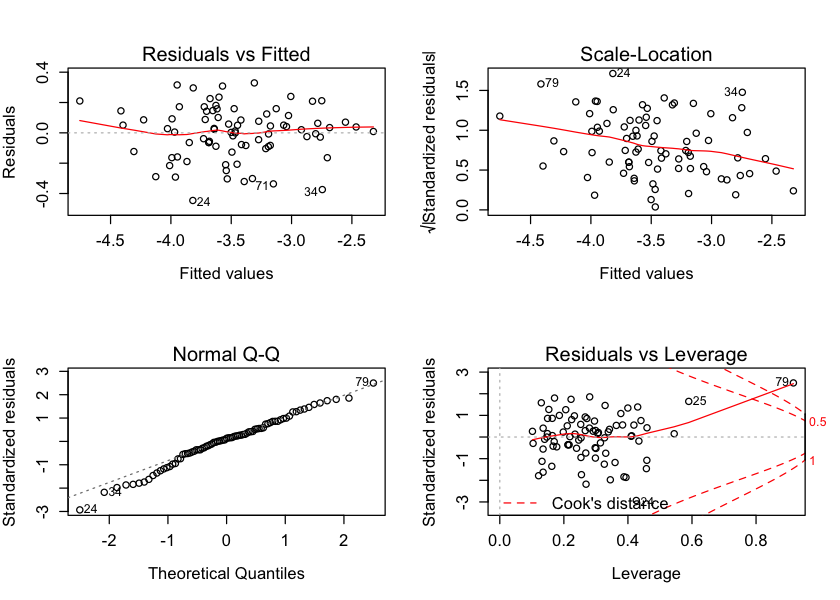

In [80]:
par(mfrow=c(2,2))

plot(m3, which=1)
plot(m3, which=3)
plot(m3, which=2)
plot(m3, which=5)

options(repr.plot.height = 5, repr.plot.width = 7, repr.plot.pointsize = 10)

It looks like despite the location variables "west" "central" and "urban" not being jointly significant, adding it into the model made adjusted R^2 go up, and the Zero-Conditional Mean Assumption is better met. Adding these variables helps us control for differences in location, even if the coefficients themselves are not statistically significant or jointly significant. We will include it into the model. 

Q1. Identify what you want to measure with each coefficient
- Model is measuring effects of the following variables, with justification for why we included it:
    - **probability of arrest (prbarr)**: from previous model, how frequently people are arrested when convicted can affect crime rates, and can lead to tangible policy changes
    - **police per capita (polpc)**: from previous model, no. of police per capita can affects crime rates and can lead to tangible policy changes
    - **average prison sentence in days (avgsen)**: from previous model: how long people are put in jail can affect crime rates, can also lead to tangible policy changes
    - **probability of conviction (prbconv)**: the more convictions per arrests, can affect crime rates. Can also lead to policy changes
    - **probability of prison (prbpris)**: the more imprisonments per conviction, the stricter the law, can affect crime rates and can lead to policy changes
    - **percent miority in 1980 (pctmin80)**: due to reality of possibility of correlation between minority groups and crime rates, even though it may not lead to direct policy changes
    - **percent young male (pctymle)**: also a reality that crime is done by more capable, stronger, and younger men.
    - **density**: included variable to control for population density. An increase in density increases people and increase crime rates.
Q2. Interpret the result of the regression in a thorough and convincing manner
- Regression with 7 features has an adjusted R^2 of 0.79, which represents that 79% of the variability of crime rates is explained by the model. "prbarr", "log(polpc)", "log(pctmin80)", and were statistically significant variables.
- Interpretation of statistically significant variables:
    - **probability of arrest (prbarr)**: an increase in percentage point in probability of arrest is associated with an 1.46% decrease in crime rate.
    - **police per capita (polpc)**: an increase in one percent in police per capita is associated with an 0.83% percent increase in crime rate.
    - **percent minority in 1980 (pctmin80)**: an increase in one percent of minority population in 1980 is associated with an increase of 0.24% in crime rate.


Q3. Evaluate all 6 CLM assumptions

    1.Linear population model

         We haven't constrained the error term yet, which means this assumption is fulfilled automatically.

    2.Random Sampling

         We don't actually know the way the data was gathered, because study doesn't mention how the counties were selected. We also don't know if there is clustering, but because the data of any individual does not provide information about the data of any other individual and we are drawing from the same population, we know that the sampling is independent and identically distributed, therefore we can say that random sampling assumption is fulfilled.

    3.No perfect multicollinearity
        
        We can see that R kept all variables with no errors, so this assumption was necessarily fulfilled.
    

    4.Zero-conditional mean
        Looking residuals vs fitted plot, there isnt much curvature of the mean of the residuals. The points are also pretty evenly scattered around the the zero line.  
        
    5.Homoskedasticity
        
    Looking at Scale Location plot, the red line has a downward slope, but we also use robust standard errors, so this assumption is fulfilled. 
    
    
    6.Normality of Errors
    
    Look at QQ plot below, the distribution of the errors are relatively normal. 

## Findings

In [81]:
se.m1 = coef(summary(m1))[, "Std. Error"]
se.m2 = coef(summary(m2))[, "Std. Error"]
se.m3 = coef(summary(m3))[, "Std. Error"]

In [82]:
stargazer(m1_log, m2, m3, type = "text",
          title = "Linear Models Predicting Crime Rates in North Carolina",
          se = list(se.m1, se.m2, se.m3), omit.stat=c("f","ser"),
          star.cutoffs = c(0.05, 0.01, 0.001))


Linear Models Predicting Crime Rates in North Carolina
                    Dependent variable:      
              -------------------------------
                        log(crmrte)          
                 (1)        (2)        (3)   
---------------------------------------------
prbarr        -2.050***  -1.460***  -1.514***
               (0.014)    (0.287)    (0.273) 
                                             
log(avgsen)   -0.009***              -0.268* 
                                     (0.108) 
                                             
log(polpc)      0.832     0.826***  0.833*** 
                          (0.102)    (0.131) 
                                             
log(prbconv)               -0.056     0.023  
                          (0.072)    (0.073) 
                                             
prbpris                    -0.318    -0.546  
                          (0.360)    (0.366) 
                                             
log(pctmin80)           

In [84]:
# Testing for joint significance of all new variables introduced in model 3

waldtest(m3, m2)

Res.Df,Df,F,Pr(>F)
58,NA,NA,NA
73,-15,2.490517,0.006717719


As we see by the F-test above, all the additional variables added in model 3 are jointly significant, so adding them into model makes sense. 

Across all 3 tables, we see the following variables to be statistically significant:
- **probability of arrest (prbarr)**: this tells us that there is a statistically significant decrease of about 17% in crime rates with a 10 percentage point increase in arrests/offenses. That means if crime rate is 5%, an increase of arrests/offenses from 10% to 20% is associated with a decrease in crime rate from 5% to 4.15%. Pretty significant. 
- **police per capita (polpc)**: This tells us that an increase in police per capita of 10% is associated with an increase of crime in 8% increase in crime rates. This was a surprising finding because one would assume that increasing number of police would decrease crime rates. But its important to remember that association is not a causal claim. It can be that BECAUSE there are high crime rates, that police per capita increases. 
- **percent minority in 1980 (pctmin80)**: An increase in percent minority by 10% was associated with a 2% increase in crime rates as well, or if crime rates was 5% it would only be associated with decrease to 4.9%.
- **density (density)**: This was an important feature to add into the model. Without it, our models would have suffered a strong omitted variable bias because density is associated with crime rates, which is also associated with a lot of our other features. In addition, it was statistically significant that an increase in density of a county was associated with increase in crime rate. 

For the most part, each statistically significant coefficient across models didn't change too much so the coefficients are pretty robust across models. 

## Omitted Variables Discussion

There are many omitted variables that could affect the outcomes:


**1. Wealth**

In large cities, the wealth seems to increases with crime. The abundance of wealth and wealthy individuals does not deter criminals from criminal activity, but instead gives them a wider option of victims to choose from. We can see this through "taxpc" as a proxy, because as wealther people are likely to be paying higher tax per capita, and it is positively associated with crime rate. Omitting wealth would likely push "prbarr" towards zero, which means that even ommitting wealth makes us under-estimate the effect size of prbarr, which means we can only get a higher statistical significance by including it in the model and is better than over-estimating. It also pushes "log(polpc)" toward zero, assuming polpc and wealth are negatively associated and wealth and crime rates are positively associated. 

**2. Education**

One omitted variable that could affect the crime rate is the education level. Minorities are unevenly targeted by police for many reasons, and one could argue that the difficulty in accessing education leads to minority individuals astray. The coefficient of "pctmin80" in our data is positive and omitting education will drive coefficient of "pctmin80" away from zero, which means that our coefficient that is statistically significant may not actually be with the inclusing of education. 


**3. Demographics within each industry**

We believe that low income relates to crime. The demographics of each industry is an omitted variable that has a high level effect on crime. There is inadequate data telling us the number of people that work within the federal reserve versus the number of people working in construction. An argument could be made for an explanatory variable that indicates a negative relationship between a high number of workers in the federal government and crime rate.

**4. Cost of Living**

Cost of living may influence the crime rate more than density. Cost of living force people to live in a compact environment, which could cause higher crime rate. If the coefficient of cost of living is positive and the coefficient of "density" is positive and association with cost of living and density is negatively correlated, then omitting cost of living pushes "density" coefficient towards zero, which is better of the two biases. 

**5. Weather**

We think weather could have positive impact on crime rate. The variable could be explained as a function of density and is a valid reason underlying why there are large numbers of people per square mile: they enjoy warmer weather. We assume coefficient of weather is positive and coefficient of density is zero, indicating that there is a positive bias and distance away from zero, which means a higher statistical significance.

Considering our omitted variables, most of the variables that we thought of pushed our statistically significant coefficients towards zero, which means that the bias of omitting these omitted variables is that under-estimate statistical significance. That's a good thing, because we have already identified those coefficients to be statistically significant, so including those omitted variables (if possible) only increases statistical significance. Hence, we can have more confidence that despite omitted variables, that our linear model still is valid, and we can try to draw conclusions. 

## Conclusion

Since we saw a negative correlation that was pretty statistically and practically significant for probability of arrests (prbarr), and we saw that police per capita had a positive association with crime rates (or at best increase in police per capita didn't decrease crime rates), our group suggests that policymakers do a further investigation in productivity of police force. In this study, the only two metrics to understand police behavior was prbarr(arrests / offenses) and police per capita, and the strongest metric to measure police productivity was probability of arrest which reveals a negative association with arrests and crime rates. More arrests, less crime rates. It makes sense, but the solution to increase arrests may not be more police, because as we saw in the model, more police is associated with more crime rates (again, not causal).

Therefore, our group suggests that if policymakers can further investigate other metrics that have to do with police productivity, and if further studies show evidence that police force in North Carolina are not as productive as they can be, policy makers can consider making some following policy changes:

- better aligning police incentives to increase police productivity, especially in the counties with higher density. I.e. better overtime pay for arrests.
- improving police training program to get new or current police to recognize recognize the importance of their role as state policemen.